In [5]:
from qiskit import QuantumCircuit , QuantumRegister , ClassicalRegister 
from qiskit import  transpiler
import matplotlib as plt


In [6]:
qubit  = QuantumRegister(1 , "Q")
ebit0 = QuantumRegister(1,"A")
ebit1 = QuantumRegister(1 ,"B")
a = ClassicalRegister(1 ,"a")
b = ClassicalRegister(1 ,"b")


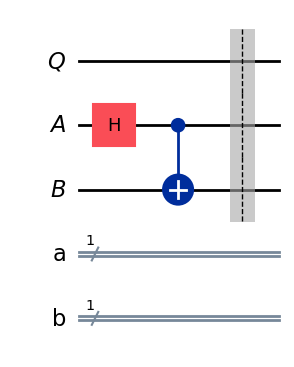

In [7]:
qc = QuantumCircuit(qubit ,ebit0 ,ebit1 ,a ,b)
qc.h(ebit0)
qc.cx(ebit0 , ebit1)
qc.barrier()
qc.draw('mpl')


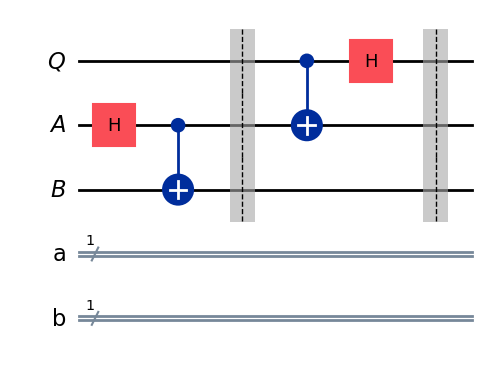

In [8]:
qc.cx(qubit ,ebit0)
qc.h(qubit)
qc.barrier()
qc.draw('mpl')

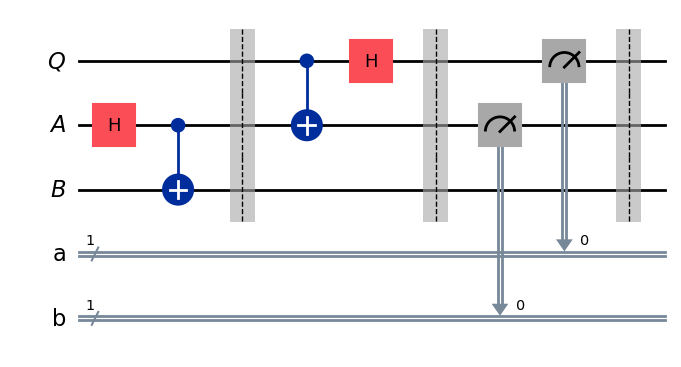

In [9]:
qc.measure(ebit0 , b)
qc.measure(qubit ,a)
qc.barrier()
qc.draw('mpl')

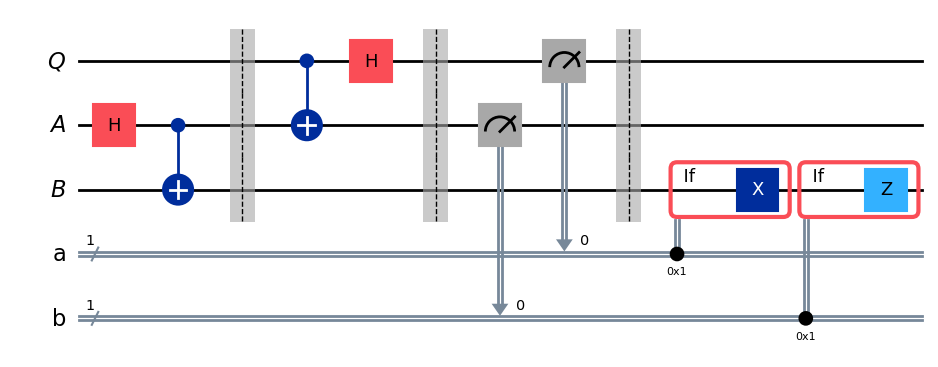

In [10]:
with qc.if_test((a ,1)):
    qc.x(ebit1)
with qc.if_test((b , 1)):
    qc.z(ebit1)
qc.draw('mpl')        

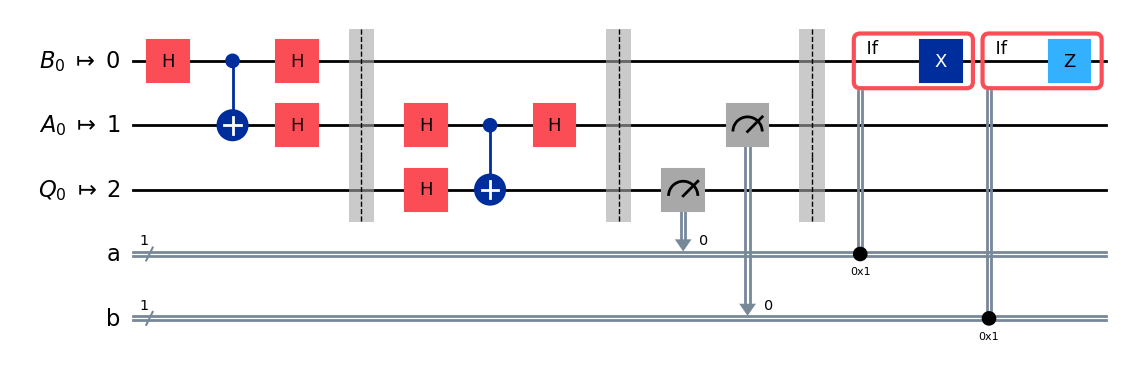

In [11]:
from qiskit import transpile
x = [[0,1],[1,2]]
qc_transpiled = transpile(qc , coupling_map=x)
qc_transpiled.draw('mpl')

In [12]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram


Measurement counts: {'1 1': 240, '0 0': 245, '1 0': 270, '0 1': 269}


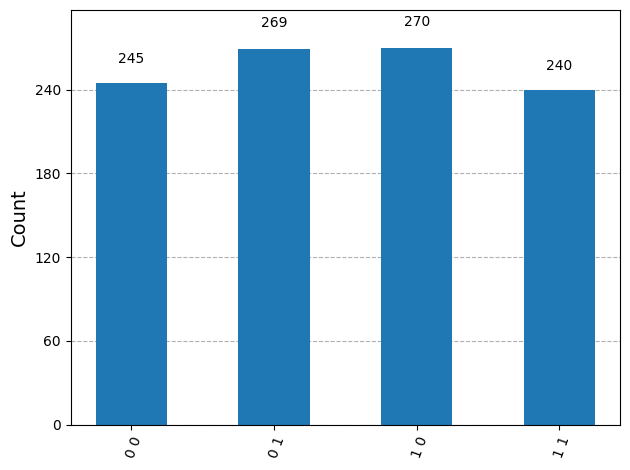

In [13]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc , shots =1024)
result = job.result()
counts = result.get_counts()
print("Measurement counts:", counts)
plot_histogram(counts)




In [14]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector


statevector Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


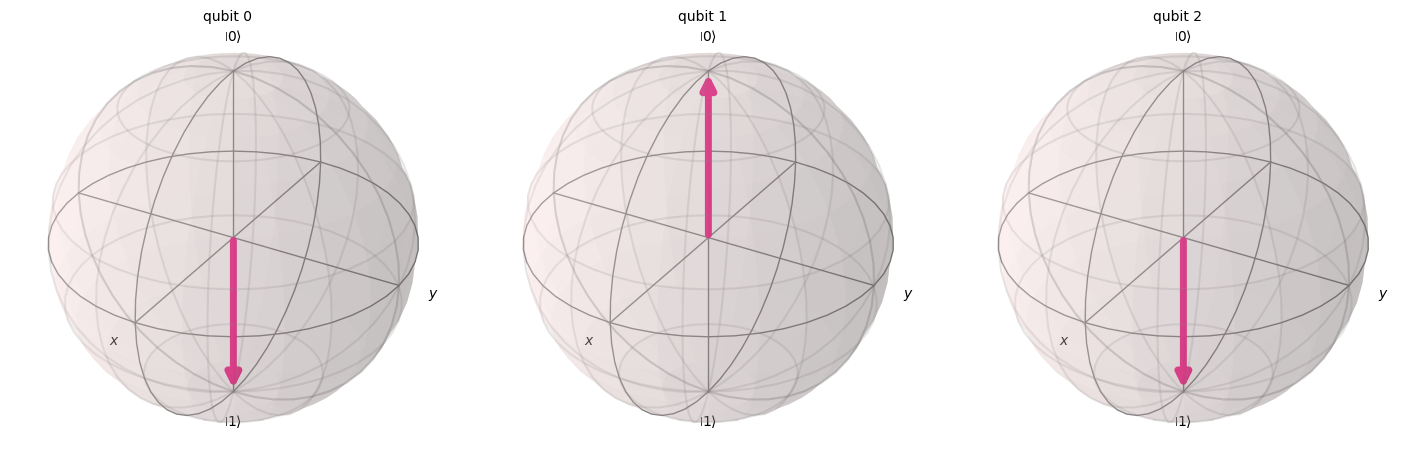

In [15]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc)
result = job.result()
statevector = result.get_statevector()
print("statevector" , statevector)
plot_bloch_multivector(statevector)
